NS-PwC

<xarray.Dataset> Size: 83GB
Dimensions:   (sample: 20000, time: 21, channel: 3, x: 128, y: 128)
Dimensions without coordinates: sample, time, channel, x, y
Data variables:
    velocity  (sample, time, channel, x, y) float32 83GB ...
----------------------------------------------------------------
----------------------------------------------------------------
[[-0.3787208  -0.3752023  -0.37419188 ... -0.3592825  -0.36379346
  -0.37707505]
 [-0.37855107 -0.37270504 -0.37057063 ... -0.3513885  -0.35843757
  -0.3762503 ]
 [-0.37276873 -0.36684883 -0.36453104 ... -0.3412982  -0.35025093
  -0.36965674]
 ...
 [-0.37412444 -0.37909406 -0.38078606 ... -0.37917125 -0.37804532
  -0.37380445]
 [-0.37150267 -0.37661335 -0.37831008 ... -0.37160587 -0.37261072
  -0.37016377]
 [-0.37292582 -0.3758008  -0.37647095 ... -0.36497486 -0.3686278
  -0.370828  ]]


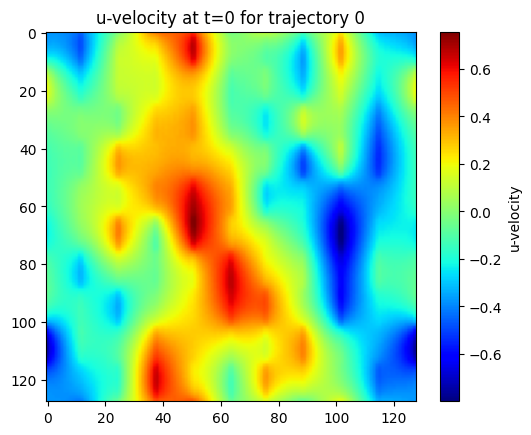

In [9]:
import xarray as xr

# Load the NetCDF dataset
ds = xr.open_dataset("datasets/NS-PwC/NS-PwC.nc")

# Print dataset structure
print(ds)

print("----------------------------------------------------------------")
# Access the variable (likely named 'velocity')
velocity = ds['velocity']  # This is a DataArray

# # Check shape and dimensions
# print("velocity shape", velocity.shape)
# print("velocity dimension",velocity.dims)  # likely: ('trajectory', 'time', 'channel', 'x', 'y')

# print("----------------------------------------------------------------")
# # Explore metadata and coordinates
# print("velocity dimension",velocity.coords)

print("----------------------------------------------------------------")
# View one trajectory
one_sample = velocity[0]  # shape: (21, 3, 128, 128)
# the 0 time step of thsi trajectory
t0 = one_sample[0]
# the horizontal velocity (a 128* 128 matrix) at time step 0 of trajectory 0 
u_t0 = t0[0]
# the horizontol velocity at coordinate(0,0) of this 128*128 matrix, if we want the exact value, we need to use value() function
print(u_t0.values)

# # Plot the horizontal velocity at t=0
import matplotlib.pyplot as plt

plt.imshow(one_sample[0, 0].values, cmap='jet')  # t=0, channel=0 (u)
plt.colorbar(label='u-velocity')
plt.title("u-velocity at t=0 for trajectory 0")
plt.show()


# 转置矩阵 (对的)

In [10]:
import xarray as xr

# Load the NetCDF dataset
ds = xr.open_dataset("datasets/NS-PwC/NS-PwC.nc")

# Print dataset structure
print(ds)

print("----------------------------------------------------------------")
# Access the variable (likely named 'velocity')
velocity = ds['velocity']  # This is a DataArray

# # Check shape and dimensions
# print("velocity shape", velocity.shape)
# print("velocity dimension",velocity.dims)  # likely: ('trajectory', 'time', 'channel', 'x', 'y')

# print("----------------------------------------------------------------")
# # Explore metadata and coordinates
# print("velocity dimension",velocity.coords)

print("----------------------------------------------------------------")
# View one trajectory
one_sample = velocity[0]  # shape: (21, 3, 128, 128)
# the 0 time step of thsi trajectory
t0 = one_sample[0]
# the horizontal velocity (a 128* 128 matrix) at time step 0 of trajectory 0 
u_t0 = t0[0]
# the horizontol velocity at coordinate(0,0) of this 128*128 matrix, if we want the exact value, we need to use value() function
print(u_t0.values)

import numpy as np
import matplotlib.pyplot as plt

# === 取第 10 帧 ===
t10 = one_sample[10]

# 原地改动：把 values 转置
u = t10[0].values.T  # shape (128,128) but now (y,x)
v = t10[1].values.T

dx = 1.0 / (u.shape[1] - 1)  # =1/127
dy = 1.0 / (u.shape[0] - 1)  # =1/127

du_dx = (u[1:-1, 2:] - u[1:-1, :-2]) / (2 * dx)
dv_dy = (v[2:, 1:-1] - v[:-2, 1:-1]) / (2 * dy)

div = du_dx + dv_dy

print("Mean abs divergence:", np.mean(np.abs(div)))
print("Max divergence (should be small):", np.max(np.abs(div)))

<xarray.Dataset> Size: 83GB
Dimensions:   (sample: 20000, time: 21, channel: 3, x: 128, y: 128)
Dimensions without coordinates: sample, time, channel, x, y
Data variables:
    velocity  (sample, time, channel, x, y) float32 83GB ...
----------------------------------------------------------------
----------------------------------------------------------------
[[-0.3787208  -0.3752023  -0.37419188 ... -0.3592825  -0.36379346
  -0.37707505]
 [-0.37855107 -0.37270504 -0.37057063 ... -0.3513885  -0.35843757
  -0.3762503 ]
 [-0.37276873 -0.36684883 -0.36453104 ... -0.3412982  -0.35025093
  -0.36965674]
 ...
 [-0.37412444 -0.37909406 -0.38078606 ... -0.37917125 -0.37804532
  -0.37380445]
 [-0.37150267 -0.37661335 -0.37831008 ... -0.37160587 -0.37261072
  -0.37016377]
 [-0.37292582 -0.3758008  -0.37647095 ... -0.36497486 -0.3686278
  -0.370828  ]]
Mean abs divergence: 0.016980192
Max divergence (should be small): 0.1512928


# 不转置（错的）

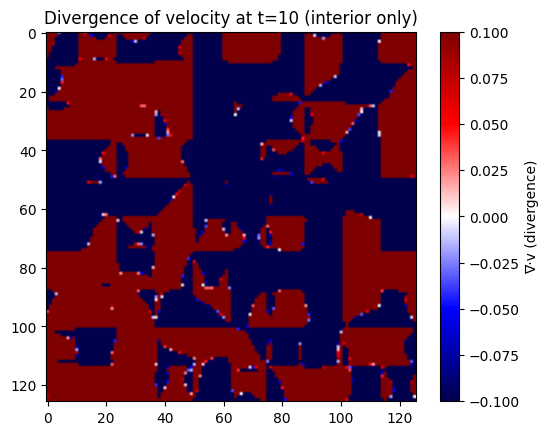

Mean divergence (should be ~0): 3.2751992
Max divergence (should be small): 11.561523


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assume one_sample[10] is your t=10 snapshot
t10 = one_sample[0]

u = t10[0].values  # horizontal velocity
v = t10[1].values  # vertical velocity

# Compute finite differences (central difference, ignoring boundaries)
du_dx = (u[1:-1, 2:] - u[1:-1, :-2]) / (2/127)  # ∂u/∂x
dv_dy = (v[2:, 1:-1] - v[:-2, 1:-1]) / (2/127)  # ∂v/∂y

# Divergence: shape (126, 126)
div = du_dx + dv_dy

# Visualization
plt.imshow(div, cmap='seismic', vmin=-0.1, vmax=0.1)
plt.colorbar(label='∇·v (divergence)')
plt.title('Divergence of velocity at t=10 (interior only)')
plt.show()

# Check how close it is to zero
print("Mean divergence (should be ~0):", np.mean(np.abs(div)))
print("Max divergence (should be small):", np.max(np.abs(div)))


# using get_dataset to load data

denormalise 后的 test data

Mean abs divergence: 3.122626e-02


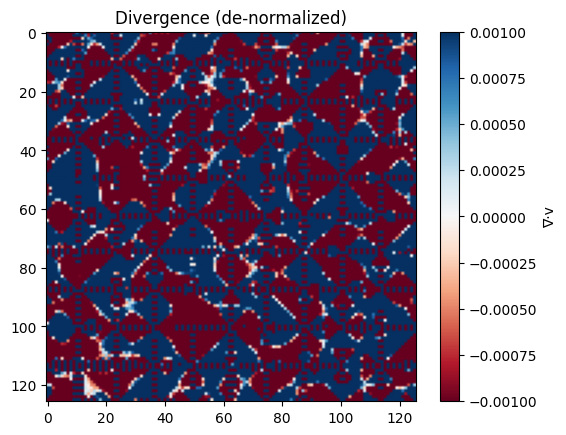

In [ ]:
import torch
import matplotlib.pyplot as plt
from scOT.problems.base import get_dataset
from scOT.problems.fluids.normalization_constants import CONSTANTS

# 1) grab one sample
ds = get_dataset(
    "fluids.incompressible.PiecewiseConstants",
    which="test",
    num_trajectories=1,
    data_path="datasets/NS-PwC",
    transpose = True,
)
inp = ds[0]["pixel_values"]   # (C, H, W)

# 2) extract & de‐normalize
means = CONSTANTS["mean"][1:3]
stds  = CONSTANTS["std"][1:3]
u_norm = inp[1]   # (H, W)
v_norm = inp[2] # (H, W)
u = u_norm * stds[0] + means[0]
v = v_norm * stds[1] + means[1]

# 3) spatial spacing
dx = dy = 1.0 / (u.shape[1] - 1)   # = 1/127

# 4) central differences (interior only)
du_dx = (u[:, 2:]   - u[:, :-2])  / (2*dx)   # shape (H, W−2)
dv_dy = (v[2:, :]   - v[:-2, :])  / (2*dy)   # shape (H−2, W)

# 5) crop to common (H−2, W−2)
du_dx = du_dx[1:-1, :]    # now (H−2, W−2)
dv_dy = dv_dy[:, 1:-1]    # now (H−2, W−2)

# 6) divergence
div = du_dx + dv_dy       # (H−2, W−2)

# 7) quick check
mean_div = div.abs().mean().item()
print(f"Mean abs divergence: {mean_div:.6e}")

# 8) visualization
plt.imshow(div.numpy(), cmap="RdBu", vmin=-1e-3, vmax=1e-3)
plt.colorbar(label="∇·v")
plt.title("Divergence (de‐normalized)")
plt.show()

test data（错的）

Total samples in dataset: 4800
Keys in sample: dict_keys(['pixel_values', 'labels', 'time', 'pixel_mask'])


Input shape: torch.Size([4, 128, 128])
Label shape: torch.Size([4, 128, 128])
----------------------------------------------------------------
['rho', 'uv', 'p']


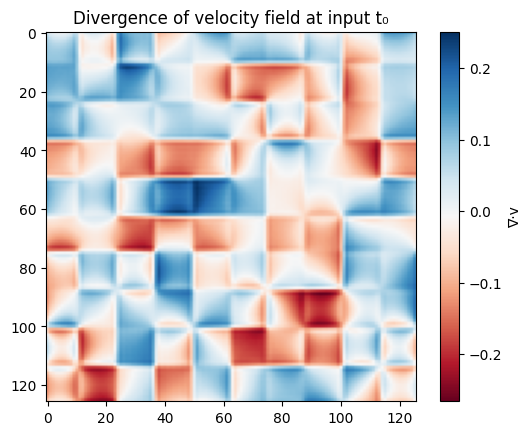

Mean absolute divergence (ignoring boundaries): 0.07515061646699905


In [5]:
import torch
from scOT.problems.base import get_dataset
import matplotlib.pyplot as plt
import numpy as np

# === 1. Load dataset ===
dataset = get_dataset(
    "fluids.incompressible.PiecewiseConstants",
    which="test",
    num_trajectories=1,
    data_path="datasets/NS-PwC",  # Adjust this if needed
    max_num_time_steps=20,            # One pair per sample: t0 → t1
    time_step_size=1,               # Δt = 1
    allowed_time_transitions=[1],   # Only allow transitions where t₁ - t₀ = 1
)

print("Total samples in dataset:", len(dataset))

# === 2. Access a single sample ===
sample = dataset[0]
print("Keys in sample:", sample.keys())


# === 3. Access input and label tensors ===
input_tensor = sample["pixel_values"]  # shape: (C, H, W)
label_tensor = sample["labels"]        # shape: (C, H, W)
print("Input shape:", input_tensor.shape)
print("Label shape:", label_tensor.shape)
print("----------------------------------------------------------------")
print(dataset.printable_channel_description)


# # === 4. Visualize ===
# input_np = input_tensor.cpu().numpy()
# label_np = label_tensor.cpu().numpy()

# fig, axs = plt.subplots(2, input_np.shape[0], figsize=(15, 4))
# for i in range(input_np.shape[0]):
#     axs[0, i].imshow(input_np[i], cmap='viridis')
#     axs[0, i].set_title(f"Input channel {i}")
#     axs[0, i].axis("off")

#     axs[1, i].imshow(label_np[i], cmap='viridis')
#     axs[1, i].set_title(f"Target channel {i}")
#     axs[1, i].axis("off")

# plt.tight_layout()
# plt.show()


# === 2. Extract u and v fields ===
u = input_tensor[1]  # horizontal velocity
v = input_tensor[2]  # vertical velocity

# === 3. Compute divergence using central differences ===
du_dx = (u[:, 2:] - u[:, :-2]) / 2  # shape: [128, 126]
dv_dy = (v[2:, :] - v[:-2, :]) / 2  # shape: [126, 128]

# === 4. Crop to common interior shape ===
du_dx = du_dx[1:-1, :]      # Now shape: [126, 126]
dv_dy = dv_dy[:, 1:-1]      # Now shape: [126, 126]

divergence = du_dx + dv_dy  # shape: [126, 126]

# === 5. Visualize divergence field ===
plt.imshow(divergence.numpy(), cmap='RdBu')
plt.colorbar(label="∇·v")
plt.title("Divergence of velocity field at input t₀")
plt.show()

# === 6. Print mean absolute divergence (for numeric check) ===
print("Mean absolute divergence (ignoring boundaries):", divergence.abs().mean().item())

# use test data for model prediction


In [ ]:
import torch
import numpy as np
import random

from scOT.model import ScOT
from scOT.trainer import TrainingArguments, Trainer
from scOT.problems.base import get_dataset
from scOT.metrics import relative_lp_error, lp_error

# Set seed
SEED = 0
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

# === Paths ===
MODEL_PATH = "checkpoints/finetune_NS-PwC_B/PoseidonFinetune_NS-PwC_B/finetune_NS-PwC_run_B"
DATA_PATH = "datasets/NS-PwC"
DATASET_NAME = "fluids.incompressible.PiecewiseConstants"
BATCH_SIZE = 16

# === Load fine-tuned model ===
print(f"[INFO] Loading fine-tuned model from {MODEL_PATH}")
model = ScOT.from_pretrained(MODEL_PATH)
model.eval()

# === Load test set ===
print(f"[INFO] Loading test dataset from {DATA_PATH}")
dataset = get_dataset(
    dataset=DATASET_NAME,
    which="test",
    num_trajectories=1,
    data_path=DATA_PATH,
    move_to_local_scratch=None
)

# === Inference ===
args = TrainingArguments(
    output_dir=".",
    per_device_eval_batch_size=BATCH_SIZE,
    dataloader_num_workers=0,
)

trainer = Trainer(
    model=model,
    args=args,
)

print("[INFO] Running inference...")
predictions = trainer.predict(dataset)

preds = predictions.predictions
labels = predictions.label_ids

# === Metrics ===
mean_rel_error = np.mean(relative_lp_error(preds, labels, p=1, return_percent=True))
mean_l1_error = np.mean(lp_error(preds, labels, p=1))

print("\n=== Evaluation Results ===")
print(f"Mean Relative L1 Error (%): {mean_rel_error:.4f}")
print(f"Mean L1 Error: {mean_l1_error:.4f}")

[INFO] Loading fine-tuned model from checkpoints/finetune_NS-PwC_B/PoseidonFinetune_NS-PwC_B/finetune_NS-PwC_run_B
[INFO] Loading test dataset from datasets/NS-PwC
[INFO] Running inference...


/home/u5t/yiheng.u5t/miniconda3/envs/torch_cuda_env/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


In [7]:
from transformers.trainer_utils import PredictionOutput

# 1. Check the type of the predictions object
print("Type of predictions:", type(predictions))

# 2. If it's a dataclass, inspect its fields
print("Available attributes:", dir(predictions))

# 3. Check individual attributes
print("Type of predictions.predictions:", type(predictions.predictions))
print("Type of predictions.label_ids:", type(predictions.label_ids))

# 4. Check shape
print("Shape of preds:", predictions.predictions.shape)
print("Shape of labels:", predictions.label_ids.shape)

print("----------------------------------------------------------------")
for i in range(4):
    print(f"Channel {i}: mean={preds[:, i].mean():.4f}, std={preds[:, i].std():.4f}")

Type of predictions: <class 'transformers.trainer_utils.PredictionOutput'>
Available attributes: ['__add__', '__annotations__', '__class__', '__class_getitem__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__match_args__', '__module__', '__mul__', '__ne__', '__new__', '__orig_bases__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '_asdict', '_field_defaults', '_fields', '_make', '_replace', 'count', 'index', 'label_ids', 'metrics', 'predictions']
Type of predictions.predictions: <class 'numpy.ndarray'>
Type of predictions.label_ids: <class 'numpy.ndarray'>
Shape of preds: (8640, 4, 128, 128)
Shape of labels: (8640, 4, 128, 128)
----------------------------------------------------------------
Channel 0: mean=0.645

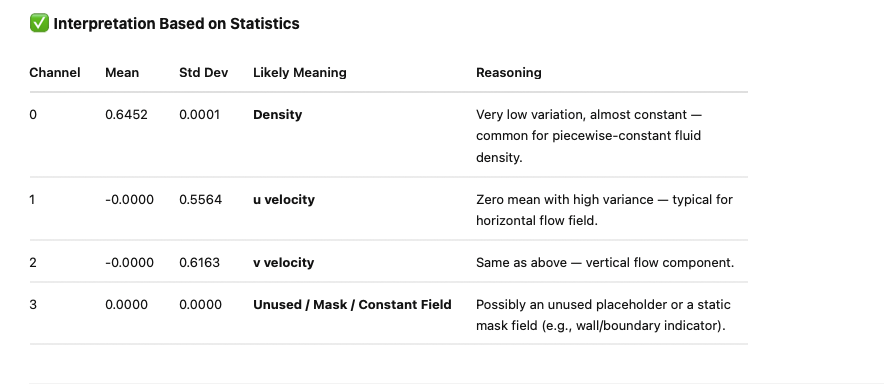

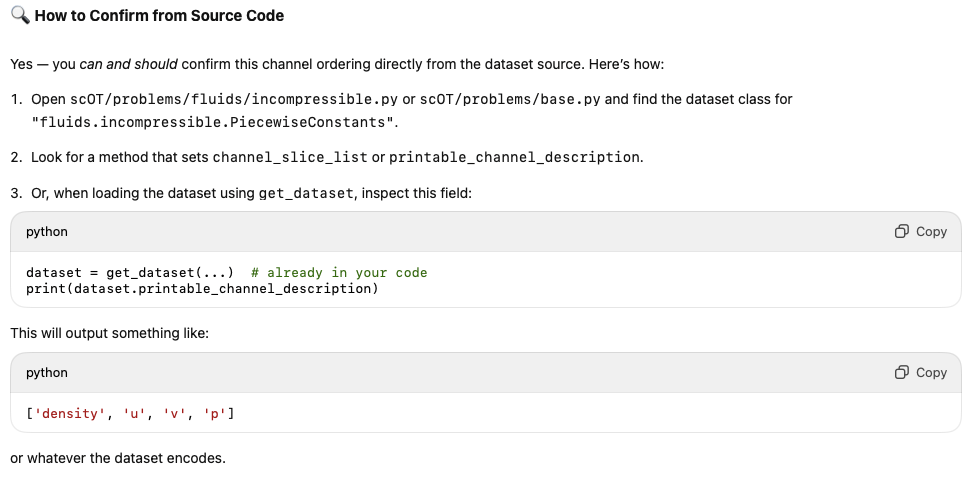

In [9]:
import numpy as np

# Extract velocity channels
u = preds[:, 1]  # shape (N, 128, 128)
v = preds[:, 2]  # shape (N, 128, 128)

# Compute central differences (exclude boundary to avoid edge effects)
du_dx = (u[:, :, 2:] - u[:, :, :-2]) / 2  # shape (N, 128, 126)
dv_dy = (v[:, 2:, :] - v[:, :-2, :]) / 2  # shape (N, 126, 128)

# To add these, align shapes: crop to (N, 126, 126)
du_dx_crop = du_dx[:, 1:-1, :]     # now shape (N, 126, 126)
dv_dy_crop = dv_dy[:, :, 1:-1]     # now shape (N, 126, 126)

# Compute divergence
divergence = du_dx_crop + dv_dy_crop  # shape (N, 126, 126)

# Measure divergence per sample
div_mean_per_sample = np.mean(np.abs(divergence), axis=(1, 2))

# Summary stats
print("=== Divergence-Free Check ===")
print(f"Mean Divergence over all samples: {np.mean(div_mean_per_sample):.6f}")
print(f"Max Divergence in any sample: {np.max(div_mean_per_sample):.6f}")
print(f"Min Divergence in any sample: {np.min(div_mean_per_sample):.6f}")

# Optional: check how many samples are ~divergence-free (within threshold)
threshold = 1e-3
num_div_free = np.sum(div_mean_per_sample < threshold)
print(f"Samples with mean divergence < {threshold}: {num_div_free}/{len(preds)}")

=== Divergence-Free Check ===
Mean Divergence over all samples: 0.059639
Max Divergence in any sample: 0.076807
Min Divergence in any sample: 0.047543
Samples with mean divergence < 0.001: 0/8640


# now we load QATed model for prediction

In [1]:
#!/usr/bin/env python
"""
qat_infer_fallback.py    Load your QAT int8 checkpoint, dequantize every
Conv2d/Linear back to float32, then run inference on GPU.
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.ao.nn import quantized as qnn
from scOT.model import ScOT, ScOTConfig
from scOT.problems.base import get_dataset

# === User fills in ===
FLOAT_MODEL_PATH = "checkpoints/finetune_NS-PwC_B/PoseidonFinetune_NS-PwC_B/finetune_NS-PwC_run_B"
QAT_MODEL_PATH   = "qat_int8_poseidon.pt"
DATA_PATH        = "datasets/NS-PwC"
DATASET_NAME     = "fluids.incompressible.PiecewiseConstants"
NUM_TRAJECTORIES = 4
BATCH_SIZE       = 8

# === 1) Build & convert a QAT model architecture (ignore float weights) ===
config = ScOTConfig.from_pretrained(FLOAT_MODEL_PATH)
model  = ScOT(config)

# must be in train mode for prepare_qat, but we won't actually train
'''
Put into train mode, attach QAT stubs, and convert to quantized modules
This gives you a CPU-quantized model (all the Conv2d, Linear, etc., are now torch.ao.nn.quantized modules).
'''
torch.backends.quantized.engine = "qnnpack"
model.train()
from torch.ao.quantization import get_default_qat_qconfig, prepare_qat, convert
model.qconfig = get_default_qat_qconfig("qnnpack")
model = prepare_qat(model, inplace=False)
model = convert(model.eval(), inplace=False)

# load your saved int8 state dict
state = torch.load(QAT_MODEL_PATH, map_location="cpu")
model.load_state_dict(state)
model.eval()

'''
Recursively replace every quantized op with its float equivalent
After this, all of your earlier quantized layers have been replaced by ordinary nn.Conv2d / nn.Linear etc.
'''
# === 2) Recursively replace quantized ops with float modules ===
def dequantize_conv_modules(module: nn.Module):
    for name, child in list(module.named_children()):
        # regular conv2d
        if isinstance(child, qnn.Conv2d):
            w_q = child.weight()      # QuantizedTensor
            b_f = child.bias()        # float Tensor or None
            w_f = w_q.dequantize()    # FloatTensor

            fconv = nn.Conv2d(
                child.in_channels, child.out_channels,
                kernel_size=child.kernel_size,
                stride=child.stride,
                padding=child.padding,
                dilation=child.dilation,
                groups=child.groups,
                bias=(b_f is not None),
            )
            fconv.weight.data.copy_(w_f)
            if b_f is not None:
                fconv.bias.data.copy_(b_f)
            setattr(module, name, fconv)

        # transpose (de)conv
        elif isinstance(child, qnn.ConvTranspose2d):
            w_q = child.weight()
            b_f = child.bias()
            w_f = w_q.dequantize()

            fconvT = nn.ConvTranspose2d(
                child.in_channels, child.out_channels,
                kernel_size=child.kernel_size,
                stride=child.stride,
                padding=child.padding,
                output_padding=child.output_padding,
                dilation=child.dilation,
                groups=child.groups,
                bias=(b_f is not None),
            )
            fconvT.weight.data.copy_(w_f)
            if b_f is not None:
                fconvT.bias.data.copy_(b_f)
            setattr(module, name, fconvT)

        else:
            # recurse into submodules
            dequantize_conv_modules(child)

def dequantize_linear_modules(module: nn.Module):
    for name, child in list(module.named_children()):
        if isinstance(child, qnn.Linear):
            w_q = child.weight()
            b_f = child.bias()
            w_f = w_q.dequantize()

            flinear = nn.Linear(
                child.in_features, child.out_features,
                bias=(b_f is not None)
            )
            flinear.weight.data.copy_(w_f)
            if b_f is not None:
                flinear.bias.data.copy_(b_f)
            setattr(module, name, flinear)
        else:
            dequantize_linear_modules(child)

dequantize_conv_modules(model)
dequantize_linear_modules(model)


'''
Move to GPU and run a standard float-inference loop
'''

# === 3) Run inference on GPU as ordinary float model ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device).eval()

test_ds = get_dataset(
    dataset          = DATASET_NAME,
    which            = "test",
    num_trajectories = NUM_TRAJECTORIES,
    data_path        = DATA_PATH,
)
print("Test‐set size:", len(test_ds))
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False)

total_se   = 0.0    # sum of squared errors
total_nel  = 0      # total number of elements

for batch in test_dl:
    xb = batch["pixel_values"].to(device)
    yb = batch["labels"].to(device)
    tm = batch["time"].to(device)
    pm = batch["pixel_mask"].to(device)

    with torch.no_grad():
        out    = model(pixel_values=xb, time=tm, labels=None)
        preds2 = out if isinstance(out, torch.Tensor) else out.output

    # sum squared errors over *all* pixels × channels × batch
    se = F.mse_loss(preds2, yb, reduction="sum").item()
    total_se  += se
    total_nel += preds2.numel()

dataset_mse = total_se / total_nel
print(f"Exact dataset‐level MSE: {dataset_mse:.6f}")


/home/u5t/yiheng.u5t/miniconda3/envs/torch_cuda_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/u5t/yiheng.u5t/miniconda3/envs/torch_cuda_env/lib/python3.10/site-packages/torch/ao/quantization/utils.py:408: UserWarning: must run observer before calling calculate_qparams. Returning default values.
  warnings.warn(
/home/u5t/yiheng.u5t/miniconda3/envs/torch_cuda_env/lib/python3.10/site-packages/torch/_utils.py:425: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  device=storage.device,


Test‐set size: 8640
Exact dataset‐level MSE: 0.001534


In [4]:
import numpy as np
# Extract velocity channels
u = preds2[:, 1]  # shape (N, 128, 128)
v = preds2[:, 2]  # shape (N, 128, 128)
# print(u)
# print(v)

# Compute central differences (exclude boundary to avoid edge effects)
du_dx = (u[:, :, 2:] - u[:, :, :-2]) / 2  # shape (N, 128, 126)
dv_dy = (v[:, 2:, :] - v[:, :-2, :]) / 2  # shape (N, 126, 128)

# To add these, align shapes: crop to (N, 126, 126)
du_dx_crop = du_dx[:, 1:-1, :]     # now shape (N, 126, 126)
dv_dy_crop = dv_dy[:, :, 1:-1]     # now shape (N, 126, 126)

# Compute divergence
divergence = du_dx_crop + dv_dy_crop  # shape (N, 126, 126)

# detach from graph, move to CPU, convert to numpy
div_np = divergence.detach().cpu().numpy()

# Measure divergence per sample
div_mean_per_sample = np.mean(np.abs(div_np), axis=(1, 2))

# Summary stats
print("=== Divergence-Free Check ===")
print(f"Mean Divergence over all samples: {np.mean(div_mean_per_sample):.6f}")
print(f"Max Divergence in any sample: {np.max(div_mean_per_sample):.6f}")
print(f"Min Divergence in any sample: {np.min(div_mean_per_sample):.6f}")

# Optional: check how many samples are ~divergence-free (within threshold)
threshold = 1e-3
num_div_free = np.sum(div_mean_per_sample < threshold)
print(f"Samples with mean divergence < {threshold}: {num_div_free}/{len(preds2)}")





=== Divergence-Free Check ===
Mean Divergence over all samples: 0.057975
Max Divergence in any sample: 0.062703
Min Divergence in any sample: 0.055378
Samples with mean divergence < 0.001: 0/10


# using transposed version

In [ ]:
import torch
import numpy as np
from scOT.problems.fluids.normalization_constants import CONSTANTS

# ---- assume preds2 is already in your notebook ----
# preds2: torch.Tensor of shape (N_samples, C_out, H, W)

# 1) Denormalize u & v
#  channels: [rho, u, v, p, ...] → indices 1 & 2
device = preds2.device
means = torch.tensor(CONSTANTS["mean"][1:3], device=device).view(1,2,1,1)
stds  = torch.tensor(CONSTANTS["std" ][1:3], device=device).view(1,2,1,1)

uv_norm = preds2[:, 1:3, :, :]        # (N, 2, H, W)
uv      = uv_norm * stds + means     # broadcast → denormalized

u = uv[:, 0, :, :]  # (N, H, W)
v = uv[:, 1, :, :] # (N, H, W)

# ——— TRANSPOSE ———
# swap H<–>W so that axis-1 is “x” and axis-2 is “y”
u = u.transpose(1, 2)  # now (N, W, H)
v = v.transpose(1, 2)

# 2) Spatial spacing
N, H, W = u.shape
dx = 1.0 / (W - 1)
dy = 1.0 / (H - 1)

# 3) Central differences (interior)
du_dx = (u[:, :, 2:]   - u[:, :, :-2]) / (2*dx)   # (N, H, W-2)
dv_dy = (v[:, 2:, :]   - v[:, :-2, :]) / (2*dy)   # (N, H-2, W)

# 4) Crop to common interior (H-2, W-2)
du_dx = du_dx[:, 1:-1, :]   # → (N, H-2, W-2)
dv_dy = dv_dy[:, :, 1:-1]   # → (N, H-2, W-2)

# 5) Divergence
div = du_dx + dv_dy         # (N, H-2, W-2)

# 6) Move to CPU / numpy & summarize
div_np = div.cpu().numpy()
abs_div = np.abs(div_np).reshape(N, -1)

mean_per_sample = abs_div.mean(axis=1)
print("=== Divergence‐Free Check ===")
print(f"Mean abs ∇·v (all samples): {mean_per_sample.mean():.6e}")
print(f"Max  abs ∇·v in any sample:  {mean_per_sample.max():.6e}")
print(f"Min  abs ∇·v in any sample:  {mean_per_sample.min():.6e}")

128
=== Divergence‐Free Check ===
Mean abs ∇·v (all samples): 7.758081e-02
Max  abs ∇·v in any sample:  8.707887e-02
Min  abs ∇·v in any sample:  7.244482e-02


/local/user/1483801151/ipykernel_262740/3524479387.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  means = torch.tensor(CONSTANTS["mean"][1:3], device=device).view(1,2,1,1)
/local/user/1483801151/ipykernel_262740/3524479387.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  stds  = torch.tensor(CONSTANTS["std" ][1:3], device=device).view(1,2,1,1)
